In [22]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

$Mass\ Scale\ is\ taken\ as\ 1 Kg \\ $
$Time\ scale\ is\ taken\ as\ that\ of\ one\ day\ which\ equal\ to\ 86400\ seconds \\ $
$Distance\ Scale\ is\ taken\ as\ 1\ Km\ =\ 1000\ m$

In [2]:
def COM(masses,matrix,n,M): # list of masses, position/velocity matrix, no. of bodies, total mass M
    coms = np.zeros((N,1,3))
    for i in range(n):
        coms[:,0,:] += masses[i]*matrix[:,i,:]
    coms[:,0,:] /= M
    
    return coms

In [3]:
def Accelaration_Function(Xarray,Masses):
    A = np.zeros((9,3))
    for i in range(9):
        for j in range(9):
            if i==j:
                continue 
            else:
                X = Xarray[i] - Xarray[j]
                A[i,0] = A[i,0] - G*Masses[j]*X[0]/((X[0]**2+X[1]**2+X[2]**2)**(1.5))
                A[i,1] = A[i,1] - G*Masses[j]*X[1]/((X[0]**2+X[1]**2+X[2]**2)**(1.5))
                A[i,2] = A[i,2] - G*Masses[j]*X[2]/((X[0]**2+X[1]**2+X[2]**2)**(1.5))
    return A

In [12]:
G = 7.46496*6.6743e-11

Initial_T = 0
Final_T = 89 # in days
del_T = 1 # in days
N = int((Final_T - Initial_T)/del_T) # number of time points: from t=0(first) to t = Final_T-1 (last)
Times= [Initial_T]
print(N)

89


In [13]:
position = np.zeros((N,9,3))
velocity = np.zeros((N,9,3))

In [14]:
masses = [1988500e24, 0.330114e24 ,4.86747e24, 5.97237e24, 0.641712e24, 1898.187e24, 568.3174e24, 86.8127e24, 102.4126e24]
M = sum(masses)

bodies = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'saturn', 'Uranus', 'Neptune']

position[0] = [[-9.95114977680456E+05, 8.98124266329700E+05, 1.58229931598423E+04],
               [3.44615441391852E+07,-5.26557638532672E+07,-7.61286267143204E+06],
               [-6.77779938168010E+07,-8.43597394901336E+07,2.69958030976802E+06],
               [-2.77904903569589E+07,1.45531279592339E+08,8.81421672415733E+03],
               [9.18866271313871E+07,2.06696061841096E+08,2.05002398237805E+06],
               [4.54003785963550E+08,-6.10682430690077E+08,-7.62390632497143E+06],
               [8.20351176602562E+08,-1.24706574543561E+09,-1.09761808144217E+07],
               [2.29533745289993E+09,1.86512722528805E+09,-2.28093347838273E+07],
               [4.40623682311692E+09,-7.81771702943420E+08,-8.54471655924357E+07]]

velocity[0] = [[-1.02322911909127E+03, -8.62040073870347E+02, 3.22970824014921E+01],
               [2.66853110932131E+06, 2.52863729277372E+06, -3.81479438257272E+04],
               [2.35980800402788E+06, -1.88090247751281E+06,-1.62002003392357E+05],
               [-2.57276934940778E+06, -4.78827962928565E+05, -7.40263589142244E+00],
               [-1.82981597359163E+06, 1.03827381243802E+06, 6.66708767010003E+04],
               [8.91855173066660E+05, 7.26974788682208E+05, -2.29741878167567E+04],
               [6.50758615732736E+05, 4.56696587751460E+05, -3.39034493618639E+04],
               [-3.75348244065152E+05, 4.29216592436392E+05, 6.45229544743987E+03],
               [7.88686712937182E+04, 4.65184720928017E+05, -1.13436707185877E+04]]

### Leapfrog loop

In [15]:
acc_temp = Accelaration_Function(position[0],masses)
for i in range(1,N):
    v_half = velocity[i-1] + del_T*acc_temp/2
    position[i] = position[i-1] + del_T*v_half
    acc_temp = Accelaration_Function(position[i],masses)
    velocity[i] = v_half + del_T*acc_temp/2
    Times.append(i*del_T)

### COM 

In [16]:
com_pos = COM(masses,position,9,M)
print("x = ",com_pos[0,0,0],"y = ",com_pos[0,0,1],"z = ",com_pos[0,0,2])
print("x = ",com_pos[-1,0,0],"y = ",com_pos[-1,0,1],"z = ",com_pos[-1,0,2])
com_vels = COM(masses,velocity,9,M)
print("Vx = ",com_vels[0,0,0],"Vy = ",com_vels[0,0,1],"Vz = ",com_vels[0,0,2])
print("Vx = ",com_vels[-1,0,0],"Vy = ",com_vels[-1,0,1],"Vz = ",com_vels[-1,0,2])


x =  -346.09411175288886 y =  215.32748992708616 z =  17.806805095601927
x =  -373.76663039718056 y =  202.25848450214139 z =  17.16757134634287
Vx =  -0.31446043914982075 Vy =  -0.14851142528759628 Vz =  -0.007264019877937411
Vx =  -0.3144604391490421 Vy =  -0.14851142528814815 Vz =  -0.007264019877947307


### Energy

In [17]:
KEs = np.zeros((N))
PEs = np.zeros((N))
Es = np.zeros((N))
fracEs = np.zeros((N))

for i in range(9):
    KEs[:] += masses[i]*0.5*(velocity[:,i,0]**2+velocity[:,i,1]**2+velocity[:,i,2]**2)

for i in range(9):
    for j in range(i+1,9):
        dist = np.zeros((N))
        dist[:] = ((position[:,i,0]-position[:,j,0])**2 +  (position[:,i,1]-position[:,j,1])**2 + (position[:,i,2]-position[:,j,2])**2)**(0.5)
        PEs[:] -= (G*masses[i]*masses[j])/dist[:]
        
Es = KEs+PEs
fracEs[:] = Es[:]/Es[0]


### Plotting

[Text(0.5, 0.92, 'solar system - 3D'),
 Text(0.5, 0, 'x(km)'),
 Text(0.5, 0, 'y(km)'),
 Text(0.5, 0, 'z(km)')]

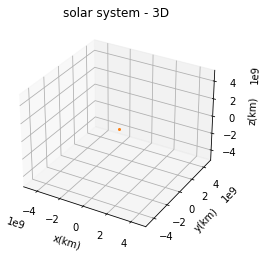

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

## planet orbits ##
for i in range(1):
    ax.plot(position[:,i,0],position[:,i,1],position[:,i,2],linewidth = 0.5)
    ax.plot([position[0,i,0]],[position[0,i,1]],[position[0,i,2]],'o', ms=2,label = bodies[i])

## COM, barycentre ##
#ax.plot(com_pos[0,0,:],com_pos[0,1,:],com_pos[0,2,:],label = 'COM')
#ax.plot([0],[0],[0],'o',ms = 5,label = 'BARYCENTRE')

limx = -5e09
limy = 5e09

ax.set_xlim(limx,limy)
ax.set_zlim(limx,limy)
ax.set_ylim(limx,limy)

ax.set(title = 'solar system - 3D', xlabel = 'x(km)',ylabel = 'y(km)',zlabel = 'z(km)')
#plt.legend()


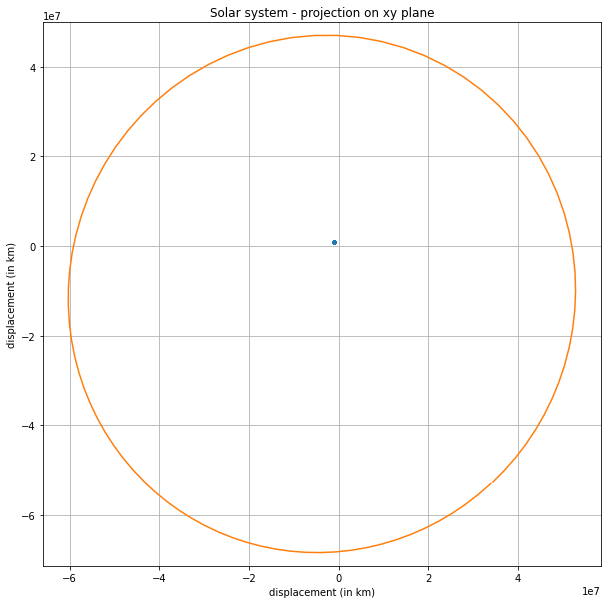

In [21]:
fig = plt.figure(figsize = (10,10))
# for i in range(2):
plt.plot(position[:,0,0],position[:,0,1], '.')
plt.plot(position[:,1,0],position[:,1,1])

plt.title('Solar system - projection on xy plane')
plt.xlabel('displacement (in km)')
plt.ylabel('displacement (in km)')
plt.axis('equal')
plt.grid(True)

### energy plot

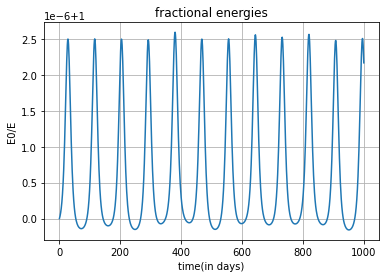

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Times,fracEs)
ax.set(title = 'fractional energies',xlabel = 'time(in days)',ylabel = 'E0/E')
plt.grid(True)

In [39]:
xdata, ydata = position[:,1,0]-position[:,0,0],position[:,1,1]-position[:,0,1]
rdata = xdata**2 + ydata**2

In [40]:
print(min(rdata))

2119549052701177.5


In [41]:
print(max(rdata))

4859226867463518.0
